In [32]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dodgers = pd.read_csv("./dodgers.csv")

In [3]:
dodgers["attend_000"] = dodgers["attend"] / 1000

In [4]:
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,division,attend_000
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Divisional,56.000
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Cross,29.729
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Cross,28.328
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Cross,31.601
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Divisional,46.549


In [5]:
mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

In [6]:
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']


In [7]:
ordered_team_names = sorted(set(dodgers["opponent"]), reverse=True)

In [8]:
print(np.mean(dodgers["attend"]))

41040.07407407407


<AxesSubplot:ylabel='attend'>

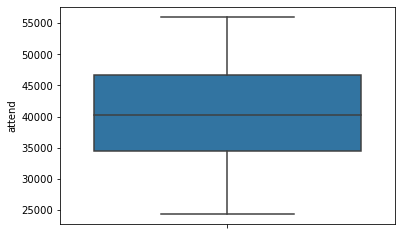

In [10]:
sns.boxplot(y="attend", data=dodgers)

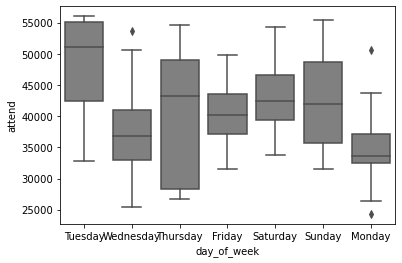

In [12]:
sns.boxplot(x="day_of_week", y="attend", data=dodgers, color = "gray");

<AxesSubplot:xlabel='month', ylabel='attend'>

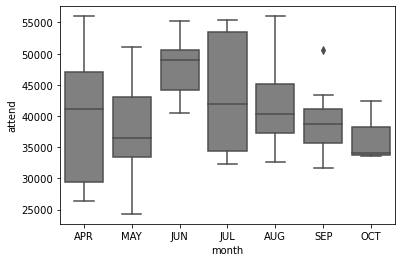

In [11]:
sns.boxplot(x="month", y="attend", data=dodgers, color = "gray")

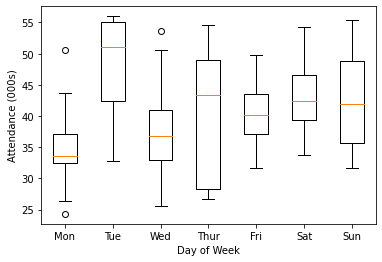

In [15]:
fig, axis = plt.subplots()

axis.set_xlabel("Day of Week")
axis.set_ylabel("Attendance (000s)")


day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
plt.show()

In [16]:
april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

In [17]:
data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']


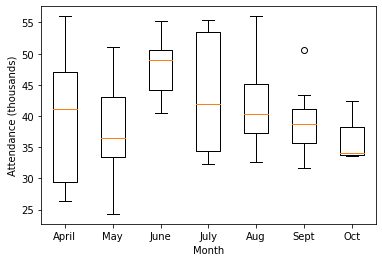

In [18]:
fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()

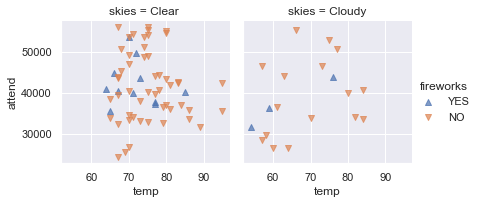

In [21]:
sns.set(style="darkgrid")

# Create a FacetGrid
g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

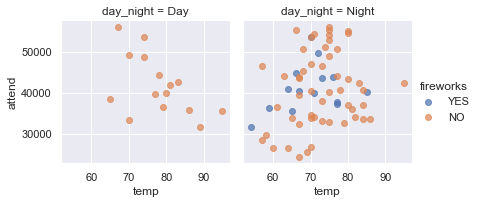

In [22]:
g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();

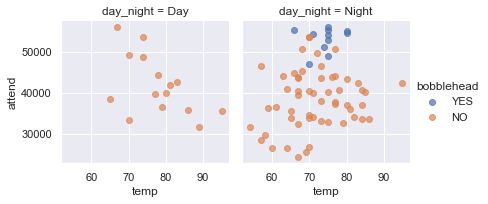

In [23]:
g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();

<AxesSubplot:xlabel='count', ylabel='fireworks'>

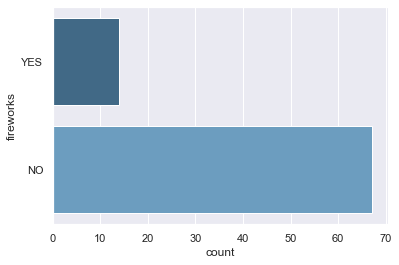

In [24]:
sns.countplot(y="fireworks", data=dodgers, palette="Blues_d",
             order=["YES", "NO"])

<AxesSubplot:xlabel='count', ylabel='bobblehead'>

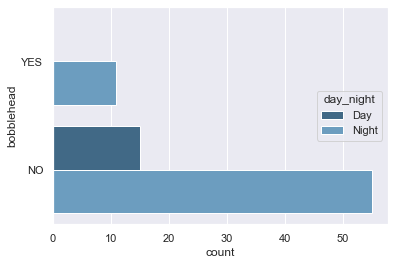

In [25]:
sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="Blues_d",
                order=["YES", "NO"])

<AxesSubplot:xlabel='attend', ylabel='opponent'>

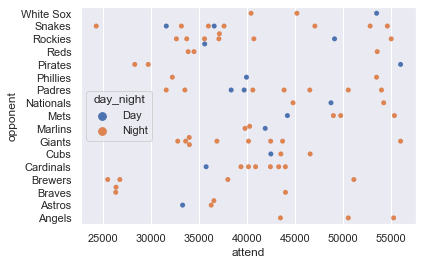

In [26]:
# Attendance by visiting team

sns.swarmplot(x="attend", y="opponent", data=dodgers, hue="day_night",
             order=ordered_team_names)

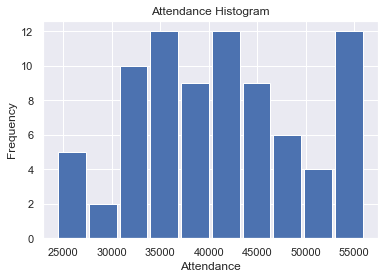

In [28]:
# Hist of attendance
plt.hist(dodgers['attend'], stacked = False, rwidth = .9)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

In [29]:
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)    

In [43]:
np.random.seed(1234)

In [44]:
dodgers['runiform'] = uniform.rvs(loc=0, scale=1, size=len(dodgers))
train = dodgers[dodgers['runiform'] >= 0.33]
test = dodgers[dodgers['runiform'] < 0.33]

print('\nTraining shape:', train.shape)
print(train.head())

print("\nTest shape:", test.shape)
print(test.head())



Training shape: (57, 17)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead    division  attend_000 ordered_day_of_week  \
1        NO         NO       Cross      29.729          3Wednesday   
2        NO         NO       Cross      28.328           4Thursday   
3       YES         NO       Cross      31.601             5Friday   
4        NO         NO  Divisional      46.549           6Saturday   
7        NO         NO  Divisional      44.014            2Tuesday   

  ordered_month  runiform  
1        1April  0.622109  
2        1April  0.437

In [45]:
formula = 'attend ~ ordered_month + ordered_day_of_week + bobblehead'

#fit the model
model = smf.ols(formula, data=train).fit()

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     5.864
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           4.70e-06
Time:                        15:12:47   Log-Likelihood:                -566.87
No. Observations:                  57   AIC:                             1162.
Df Residuals:                      43   BIC:                             1190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [47]:
train['prediction'] = model.fittedvalues

C:\Users\Alec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
test['prediction'] = model.predict(test)

C:\Users\Alec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(test['attend'].corr(test['prediction']),2),3))


Proportion of Test Set Variance Accounted for:  0.217


In [52]:
full_model = smf.ols(formula, data=dodgers).fit()
print(full_model.summary())

print("\nEstimated Effect of Bobblehead Promotion on Attendance",
     round(full_model.params[13], 0))

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           2.08e-07
Time:                        15:16:02   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

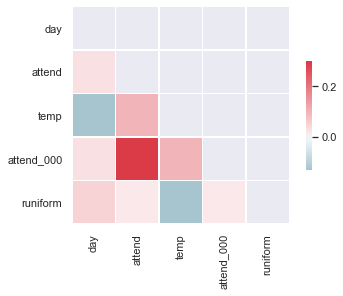

In [54]:
corr = dodgers.corr()

# Mask for upepr trinagle of the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True,
           linewidth=0.5, cbar_kws={"shrink": .5})
plt.show()